In [1]:
import csv
import datetime
import os
import math
import shapefile as shp
import matplotlib.pyplot as plt

In [2]:
dir_path = r'P:/11202200.005-kpp-cip2018/data/'
file_path = os.path.join(dir_path,'water_level_data')
# os.chdir(dir_path)
# locations available at http://matroos.deltares.nl/timeseries/search/
lon = [6.9338, 3.8604, 5.4098, 5.7609, 5.3335]
lat = [53.3275, 51.8638, 53.1767, 53.4311, 53.4436]
buoy = ['delfzij', 'haringvliet_10', 'harlingen', 'nes', \
        'terschelling_noordzee']
numfile = len(buoy)

delfzij
haringvliet_10
harlingen
nes
terschelling_noordzee


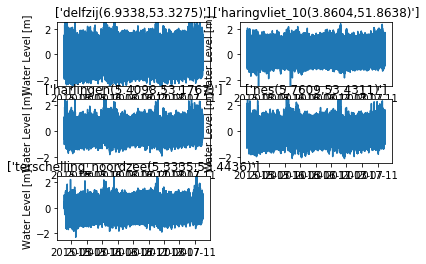

In [4]:
# Saving each to separate file
plotting = True
saveoutput = True

# count the files
counter=1
for longitude, latitude, loc in zip(lon, lat, buoy):
    shape = shp.Writer(shp.POINT)
    shape.autoBalance = 1
    # access the CSV file
    with open(os.path.join(file_path,loc+'.csv'), 'rt', encoding="utf8") as csvfile:
        print(loc)
        r = csv.reader(csvfile, delimiter=',')
        # create the field names and data type for each.
        shape.field("LocationName", "C")
        shape.field("DateTime", "C")
        shape.field("WaterLevel", "N", 12, 8)
        plot_date_time, plot_water_level = [], []
        #loop through each of the rows and assign the attributes to variables
        for i,row in enumerate(r):
            if i > 0:
                date_time = datetime.datetime.strptime(row[0],'%Y-%m-%d %H:%M:%S')
                water_level = float(row[1])
                if (math.isnan(water_level)):
                    pass
                else:
                    shape.point(float(longitude),float(latitude))       
                    shape.record(loc, date_time.isoformat(), water_level)
                    plot_date_time.append(date_time)
                    plot_water_level.append(water_level)
                
        # create the point geometry
        if plotting:
            plt.subplot(3, 2, counter)
            plt.plot(plot_date_time, plot_water_level)
            plt.title([loc+ '('+str(longitude)+','+str(latitude)+')'])
#             plt.xlim(datetime.datetime(2015,6,1),datetime.datetime(2015,6,3))
            plt.ylim(-2.5,2.5)
            plt.ylabel('Water Level [m]')

#     save the Shapefile
    if saveoutput:
        shape.save(loc)
        
    counter = counter + 1
    
plt.show()